# Perfiles longitudinales

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm, colors
import geopandas as gpd
import seaborn as sns
from scipy import stats

In [2]:
#to import data for chi and longitudinal profiles
data= gpd.read_file("G:/My Drive/INVESTIGACION/POSDOC/Data/Vector/AOI_30m_chi_full_adj.shp")

In [3]:
data.astype({'basin_key':'int'});

In [4]:
np.unique(data['basin_key']);

In [5]:
relict=gpd.read_file("../Data/relict_chi.gpkg")
recent_elev=gpd.read_file("../Data/recent2_elev.gpkg")
recent_chi=gpd.read_file("../Data/recent2_chi.gpkg")

In [6]:
kick=gpd.read_file("../Data/kinckpoints_chi.shp")

In [7]:
knick_cauca=kick[kick["basin_key"]==435]
knick_magda=kick[kick["basin_key"]==19]
knick_atrato=kick[kick["basin_key"]==(620 or 534)]

### Figure 5

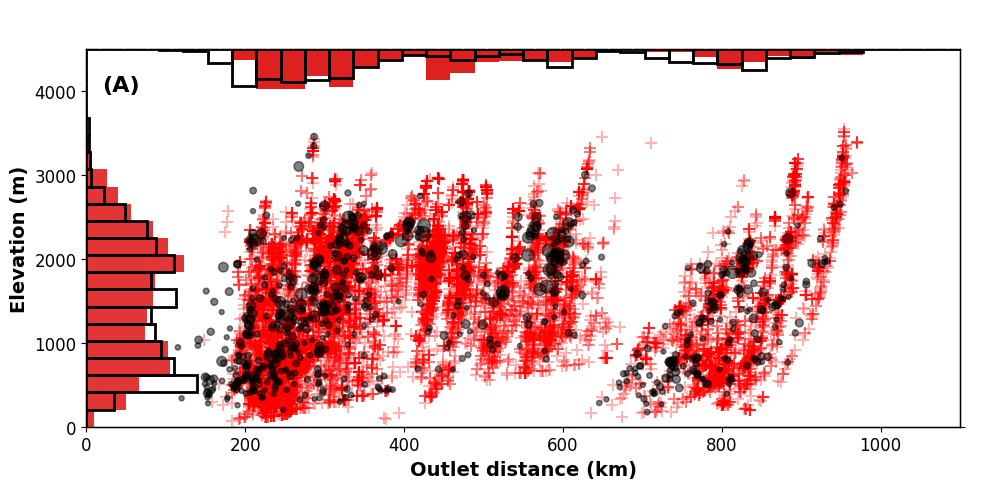

In [11]:
fig,ax=plt.subplots(figsize = (10,5))

bind=np.arange(0,1100000,30000)
kick['bins_dist'] = pd.cut(kick['flow_dista'],bins=bind,labels=bind[1:])
recent_chi['bins_dist'] = pd.cut(recent_chi['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
kick['bins_elev'] = pd.cut(kick['z'],bins=bine,labels=bine[1:])
recent_chi['bins_elev'] = pd.cut(recent_chi['elevation'],bins=bine,labels=bine[1:])

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Cauca
cauca=data[data["basin_key"].isin([435])]
ax.scatter(cauca.flow_dista/1000, cauca.elevation, s=0.05,c='steelblue',alpha=0.001)
#Magda
magda=data[data["basin_key"].isin([19])]
ax.scatter(magda.flow_dista/1000, magda.elevation,s=0.05,c='steelblue',alpha=0.001)
#Atrato
atrato=data[data["basin_key"].isin([620])]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.05,c='steelblue',alpha=0.001)
atrato=data[data["basin_key"].isin([534])]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.1,c='steelblue',alpha=0.001)


#print landslides and knickpoints
ax.scatter(recent_chi.flow_dista/1000,recent_chi.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(kick.flow_dista/1000,kick.elevation,s=0.5*kick.dz,marker=".",c="black",alpha=0.5)
ax.text(20, 4000,"(A)",size=16,weight='bold')

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*recent_chi.groupby('bins_dist').size()/recent_chi.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*kick.groupby('bins_dist').size()/kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*recent_chi.groupby('bins_elev').size()/recent_chi.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*kick.groupby('bins_elev').size()/kick.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0, 4500,1000))
ax.set_ylim(0,4500)
ax.set_xlim(0,1100);

fig.tight_layout() 
plt.savefig('../Figures/fig5A.png',dpi=500)

### Figures 5A

In [12]:
atrato=data[data["source_key"].isin([22450])]
atrato.tail(2)

,node,row,col,latitude,longitude,chi,elevation,flow_dista,drainage_a,m_chi,b_chi,source_key,basin_key,segmented_,geometry
1987420,105265577,9536,1738,6.894897,-76.765744,0.0008,3.0,30.708,1.538800e+10,8.1067,4.4123,22450,620,4.4188,POINT (304898.264 762491.146)
1987421,105265578,9536,1739,6.894898,-76.765466,0.0000,1.0,0.000,1.538800e+10,7.2448,4.4918,22450,620,4.4918,POINT (304928.980 762491.146)


In [13]:
np.arctan((atrato.loc[1980475,"elevation"]-atrato.loc[1987421,"elevation"])/(atrato.loc[1980475,"flow_dista"]-atrato.loc[1987421,"flow_dista"]))

7.67259878971184e-05

C:\Users\edier\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


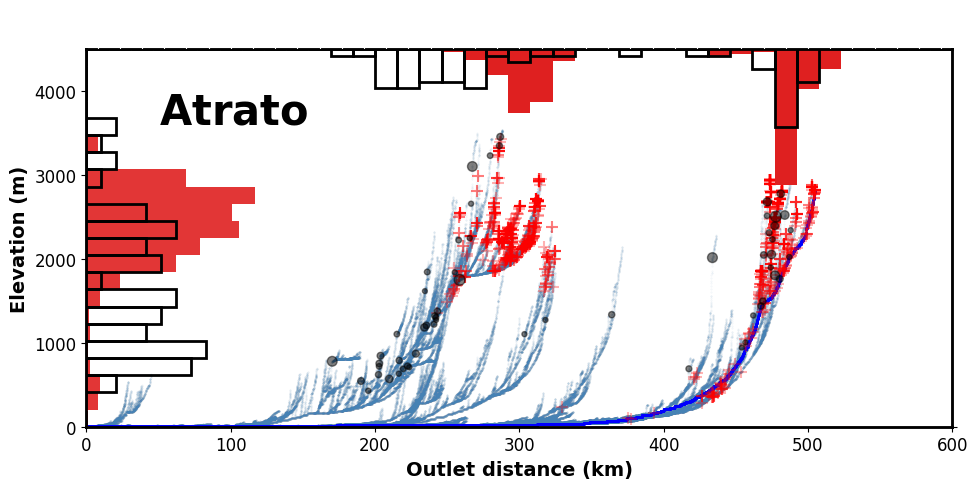

In [16]:
fig,ax=plt.subplots(figsize = (10,5))

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Atrato
atrato=data[data["basin_key"]==(620 or 534)]
ax.scatter(atrato.flow_dista/1000, atrato.elevation,s=0.1,c='steelblue',alpha=0.1)

#to print selected drainage
data3=data[data["source_key"].isin([22450])]
ax.scatter(data3.flow_dista/1000,data3.elevation,s=0.5,c="blue",label=r"$\bf{Atrato}$")

#knickpoints and landslides
atrato_kick=kick[kick["basin_key"]==(620 or 534)]
atrato_recent=recent_chi[recent_chi["basin_key"]==(620 or 534)]

bind=np.arange(0,600000,15000)
atrato_kick['bins_dist'] = pd.cut(atrato_kick['flow_dista'],bins=bind,labels=bind[1:])
atrato_recent['bins_dist'] = pd.cut(atrato_recent['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
atrato_kick['bins_elev'] = pd.cut(atrato_kick['z'],bins=bine,labels=bine[1:])
atrato_recent['bins_elev'] = pd.cut(atrato_recent['elevation'],bins=bine,labels=bine[1:])

#print landslides and knickpoints
ax.scatter(atrato_recent.flow_dista/1000,atrato_recent.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(atrato_kick.flow_dista/1000,atrato_kick.elevation,s=0.5*atrato_kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*atrato_recent.groupby('bins_dist').size()/atrato_recent.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*atrato_kick.groupby('bins_dist').size()/atrato_kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*atrato_recent.groupby('bins_elev').size()/atrato_recent.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*atrato_kick.groupby('bins_elev').size()/atrato_kick.groupby('bins_elev').size().sum(),orient = 'h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0, 4500,1000))
ax.set_ylim(0,4500)
ax.set_xlim(0,600);

#ax3.legend(loc='upper left',frameon=False,fontsize=16)
ax.legend(bbox_to_anchor=(0.3,0.99),prop={'size':30},frameon=False,markerscale=0)
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)

fig.tight_layout() 
plt.savefig('../Figures/fig5Atrato.png',dpi=500,transparent=True);

#### Cauca

In [14]:
cauca=data[data["source_key"].isin([14126])]
cauca.tail(2)

,node,row,col,latitude,longitude,chi,elevation,flow_dista,drainage_a,m_chi,b_chi,source_key,basin_key,segmented_,geometry
1167391,41461418,4388,8656,8.328109,-74.842572,0.000761,4.0,43.427,3.718300e+10,48.474,17.134,14126,435,17.171,POINT (517334.327 920574.521)
1167392,41449951,4387,8655,8.328386,-74.842851,0.000000,1.0,0.000,3.718300e+10,40.622,17.932,14126,435,17.932,POINT (517303.606 920605.208)


In [49]:
np.arctan((cauca.loc[1152707,"elevation"]-cauca.loc[1162703,"elevation"])/(cauca.loc[1152707,"flow_dista"]-cauca.loc[1162703,"flow_dista"]))

0.0015785749822602385

In [44]:
cauca.loc[1152707,"elevation"]-cauca.loc[1162703,"elevation"]

672.1419999999999

In [45]:
cauca.loc[1152707,"flow_dista"]-cauca.loc[1162703,"flow_dista"]

425790.0

C:\Users\edier\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


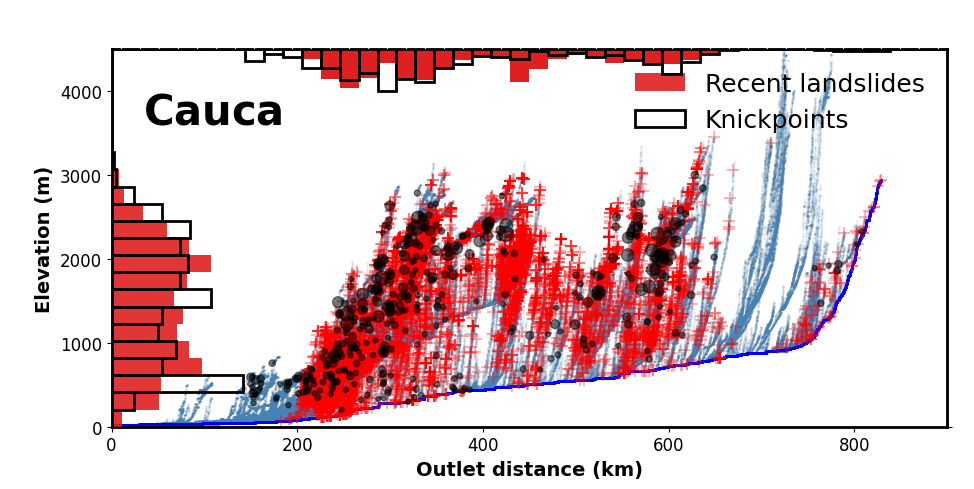

In [22]:
fig,ax=plt.subplots(figsize = (10,5))

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Cauca
cauca=data[data["basin_key"].isin([435])]
ax.scatter(cauca.flow_dista/1000, cauca.elevation, s=0.1,c='steelblue',alpha=0.1)

#to print selected drainage
data1=data[data["source_key"].isin([14126])]
ax.scatter(data1.flow_dista/1000,data1.elevation,s=0.5,c="blue",label=r"$\bf{Cauca}$")

#knickpoints and landslides
cauca_kick=kick[kick["basin_key"]==435]
cauca_recent=recent_chi[recent_chi["basin_key"]==435]

bind=np.arange(0,900000,20000)
cauca_kick['bins_dist'] = pd.cut(cauca_kick['flow_dista'],bins=bind,labels=bind[1:])
cauca_recent['bins_dist'] = pd.cut(cauca_recent['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
cauca_kick['bins_elev'] = pd.cut(cauca_kick['z'],bins=bine,labels=bine[1:])
cauca_recent['bins_elev'] = pd.cut(cauca_recent['elevation'],bins=bine,labels=bine[1:])

#print landslides and knickpoints
ax.scatter(cauca_recent.flow_dista/1000,cauca_recent.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(cauca_kick.flow_dista/1000,cauca_kick.elevation,s=0.5*cauca_kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*cauca_recent.groupby('bins_dist').size()/cauca_recent.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*cauca_kick.groupby('bins_dist').size()/cauca_kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*cauca_recent.groupby('bins_elev').size()/cauca_recent.groupby('bins_elev').size().sum(),label="Recent landslides",orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*cauca_kick.groupby('bins_elev').size()/cauca_kick.groupby('bins_elev').size().sum(),label="Knickpoints",orient = 'h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0,4500,1000))
ax.xaxis.set_ticks(np.arange(0,900,200))
ax.set_ylim(0,4500)
ax.set_xlim(0,900);

ax3.legend(loc='upper right',frameon=False,fontsize=18)
ax.legend(bbox_to_anchor=(0.25,0.99),prop={'size':30},frameon=False,markerscale=0)
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)

fig.tight_layout() 

plt.savefig('../Figures/fig5Cauca.png',dpi=500,transparent=True)

#### Magdalena

In [16]:
magda=data[data["source_key"].isin([370])]

In [52]:
np.arctan((magda.loc[19636,"elevation"]-magda.loc[39388,"elevation"])/(magda.loc[19636,"flow_dista"]-magda.loc[38388,"flow_dista"]))

0.00022478662748081732

C:\Users\edier\miniconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


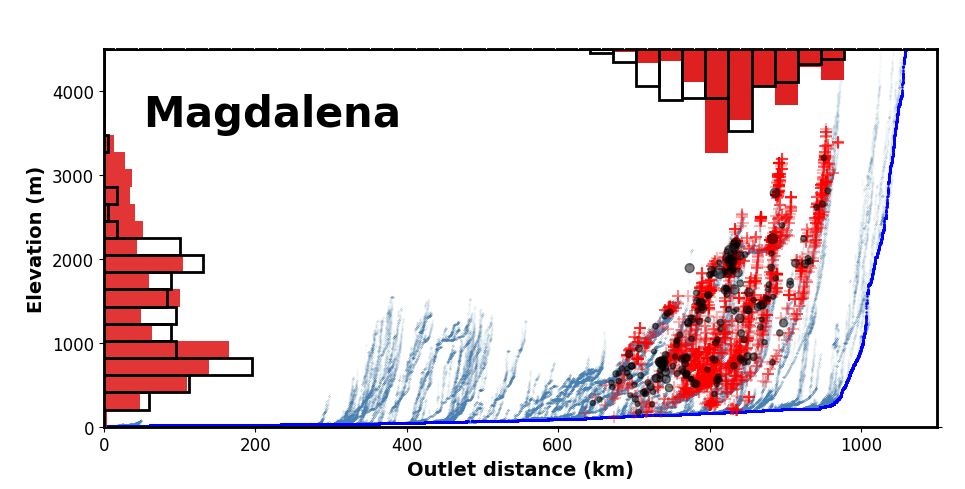

In [18]:
fig,ax=plt.subplots(figsize = (10,5))

ax3 = ax.twinx().twiny()
ax2 = ax3.twinx().twiny()

#Magda
magda=data[data["basin_key"].isin([19])]
ax.scatter(magda.flow_dista/1000, magda.elevation,s=0.01,c='steelblue',alpha=0.1)

#to print selected drainage
data2=data[data["source_key"].isin([370])]
ax.scatter(data2.flow_dista/1000,data2.elevation,s=0.5,c="blue",label=r"$\bf{Magdalena}$")

#knickpoints and landslides
magda_kick=kick[kick["basin_key"]==19]
magda_recent=recent_chi[recent_chi["basin_key"]==19]

bind=np.arange(0,1100000,30000)
magda_kick['bins_dist'] = pd.cut(magda_kick['flow_dista'],bins=bind,labels=bind[1:])
magda_recent['bins_dist'] = pd.cut(magda_recent['flow_dista'],bins=bind,labels=bind[1:])

bine=np.arange(0,4500,200)
magda_kick['bins_elev'] = pd.cut(magda_kick['z'],bins=bine,labels=bine[1:])
magda_recent['bins_elev'] = pd.cut(magda_recent['elevation'],bins=bine,labels=bine[1:])

#print landslides and knickpoints
ax.scatter(magda_recent.flow_dista/1000,magda_recent.elevation,s=80,marker="+",c="red",alpha=0.3)
ax.scatter(magda_kick.flow_dista/1000,magda_kick.elevation,s=0.5*magda_kick.dz,marker=".",c="black",alpha=0.5)

#ax2 barras verticales hacia abajo
k=1
ax2=sns.barplot(x=bind[1:],y=k*magda_recent.groupby('bins_dist').size()/magda_recent.groupby('bins_dist').size().sum(),width=1,color="red",linewidth=0, edgecolor=".5",)
ax2=sns.barplot(x=bind[1:],y=k*magda_kick.groupby('bins_dist').size()/magda_kick.groupby('bins_dist').size().sum(),width=1,fill=False,linewidth=2, edgecolor="black",)
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel(' ', color="white") 
ax2.set_ylabel(' ', color="white")  
ax2.tick_params(axis='x', colors="white")#upper
ax2.tick_params(axis='y', colors="white")#right inverted
ax2.set_ylim(0,1)
ax2.invert_yaxis()
ax2.yaxis.set_ticks([1])
plt.gca().axes.yaxis.set_ticklabels([])

#ax3 barras horizontales
sns.barplot(y=bine[1:],x=k*magda_recent.groupby('bins_elev').size()/magda_recent.groupby('bins_elev').size().sum(),orient='h',ax=ax3,width=1,color="red",alpha=0.9,linewidth=0, edgecolor=".5",)
sns.barplot(y=bine[1:],x=k*magda_kick.groupby('bins_elev').size()/magda_kick.groupby('bins_elev').size().sum(),orient = 'h',ax=ax3,width=1,fill=False,linewidth=2, edgecolor="black",)
ax3.set_xlim(0,1)
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_xlabel(' ', color="white") 
ax3.set_ylabel(' ', color="white")  
ax3.invert_yaxis()

ax.set_xlabel('Outlet distance (km)', color="black",size=14,weight="bold") 
ax.set_ylabel('Elevation (m)', color="black",size=14,weight="bold")  
ax.tick_params(axis='x', colors="black",labelsize=12)
ax.tick_params(axis='y', colors="black",labelsize=12)
ax.yaxis.set_ticks(np.arange(0,4500,1000))
ax.xaxis.set_ticks(np.arange(0,1100,200))
ax.set_ylim(0,4500)
ax.set_xlim(0,1100);

#ax3.legend(loc='upper left',frameon=False,fontsize=16)
ax.legend(bbox_to_anchor=(0.4,0.99),prop={'size':30},frameon=False,markerscale=0)
ax.spines[['right', 'top','left','bottom']].set_linewidth(2)
fig.tight_layout() 

plt.savefig('../Figures/fig5Magdalena.png',dpi=500,transparent=True)